# PATRIOTS WIKIPEDIA PAGE VIEWS OVER TIME

This is a Jupyter Notebook that makes use of data curation and analysis to analyze the Patriots' Wikipedia Page's views per article and make insights from that. There are three steps in this process, firstly being using the REST API to get the actual data from the Patriots Wikipedia page. The second step converted the data into data with two headers, namely the views, and date. Additionally, it turned the data into a list of dictionaries that dataframe methods could successfully be used in in Step 3. 

DATA WORLD LINK: https://data.world/tanukau/data-curation-analysis/


# Step 1 - Data Extraction

What we're doing here is importing a necessary python library to convert the views data from the Wikipedia Patriots page into a json file  To do this, I'm using the REST API for Wikimedia. After getting this json file, I can make a dictionary out of the "items", AKA everything from January 1st of 2016 to January 1st of 2017 (Tom Brady's Prime). Then, I'm filtering out the first 8 characters of the timestamp so that it's 2016-01-01 (this is 8 characters) and iterating through this items data to get everything from 2016 to 2017. At the beginning of this code, I've also imported all necessary libraries needed to show the matplot and in the bottom, I am keeping a raw file of the data. 

https://wikimedia.org/api/rest_v1/#/

In [12]:
import requests
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt

request = requests.get('https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/New_England_Patriots/daily/20160101/20170101', headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) Chrome/90.0.4430.212 Safari/537.36"})
data = request.json()['items']
views = {i['timestamp'][:8]: i['views'] for i in data}
json.dump(views, open('raw.json', 'w'))
views = views.items()

print(views)

dict_items([('20160101', 5919), ('20160102', 5185), ('20160103', 10581), ('20160104', 10919), ('20160105', 7209), ('20160106', 5828), ('20160107', 5492), ('20160108', 5725), ('20160109', 7045), ('20160110', 13763), ('20160111', 9201), ('20160112', 7257), ('20160113', 8606), ('20160114', 7279), ('20160115', 7163), ('20160116', 29581), ('20160117', 45324), ('20160118', 26721), ('20160119', 13840), ('20160120', 11684), ('20160121', 11511), ('20160122', 12003), ('20160123', 10962), ('20160124', 54378), ('20160125', 38906), ('20160126', 14157), ('20160127', 9289), ('20160128', 8250), ('20160129', 6754), ('20160130', 5617), ('20160131', 6853), ('20160201', 6901), ('20160202', 5912), ('20160203', 6300), ('20160204', 6266), ('20160205', 7301), ('20160206', 7473), ('20160207', 18174), ('20160208', 38821), ('20160209', 10515), ('20160210', 6568), ('20160211', 5287), ('20160212', 4657), ('20160213', 4035), ('20160214', 4155), ('20160215', 3259), ('20160216', 3200), ('20160217', 3655), ('20160218'

# Step 2 - Data Transformation & Load

Instead of having just data that's in parentheses without any description of the difference between date and how many views, the list_of_data variable makes the dictionary into a list of dictionaries. Then, we're converting this list of data into a pandas dataframe table with four attributes, views, date, the day of the week, and month. Lastly, as Professor Mishra wants, we're keeping a CSV file. 

In [15]:
list_of_data = [{"date":date, "views":view} for date, view in views]

df = pd.DataFrame(list_of_data)
df["date"] = pd.to_datetime(df["date"])
df["week_day"] = df['date'].dt.day_name()
df["month"] = df['date'].dt.month_name()

df.to_csv('pats_views.csv', encoding='utf-8', index=False)



[{'date': '20160101', 'views': 5919}, {'date': '20160102', 'views': 5185}, {'date': '20160103', 'views': 10581}, {'date': '20160104', 'views': 10919}, {'date': '20160105', 'views': 7209}, {'date': '20160106', 'views': 5828}, {'date': '20160107', 'views': 5492}, {'date': '20160108', 'views': 5725}, {'date': '20160109', 'views': 7045}, {'date': '20160110', 'views': 13763}, {'date': '20160111', 'views': 9201}, {'date': '20160112', 'views': 7257}, {'date': '20160113', 'views': 8606}, {'date': '20160114', 'views': 7279}, {'date': '20160115', 'views': 7163}, {'date': '20160116', 'views': 29581}, {'date': '20160117', 'views': 45324}, {'date': '20160118', 'views': 26721}, {'date': '20160119', 'views': 13840}, {'date': '20160120', 'views': 11684}, {'date': '20160121', 'views': 11511}, {'date': '20160122', 'views': 12003}, {'date': '20160123', 'views': 10962}, {'date': '20160124', 'views': 54378}, {'date': '20160125', 'views': 38906}, {'date': '20160126', 'views': 14157}, {'date': '20160127', 'v

# Step 3 - Analysis: Summary and Visualizations

Rather than describing the "median" of the dates, which gives no serious insights, we'd rather have the mean, median, and standard deviation of the views. Therefore the .describe() method is used specifically on views. The mean number of views is clearly skewed upwards due to the superbowl at the beginning of 2016, and during regular-season, there were three games at home that the Pats won back to back. That accounts for the increased Pats' page views at the beginning of 2016s well as at the beginning of their regular season after losing their first game to the Bills. This is why the Median is a better indicator of the data, sitting at 3,669 views. 

The standard deviation of the views is approximately 5,794.95, which indicates a relatively high variability in daily page views. This high standard deviation, compared to the mean, suggests that there could be days with very high page views and days with very low page views.

In [18]:
df.describe()["views"]


count      367.000000
mean      5317.046322
min       1666.000000
25%       2475.500000
50%       3669.000000
75%       5906.500000
max      54378.000000
std       5794.950627
Name: views, dtype: float64

Making the actual plot was quite easy, plotting page views versus what date it is between 2016 and 2017. Like I said before, the peak in views at the beginning of the year was because of the superbowl which the Pats played in in early February. Obviously, the page views became lower during off-season/summer because there is no NFL activity that really matters besides trades/contracts. Then, the page views grew quite linearly during the regular season because this is when the Pats started winning games, a lot of which were "at home", all leading up to the Superbowl. The random peaks in the September-December time was because of games between the reigning Pats and another great team, like the Bills or Dolphins. 

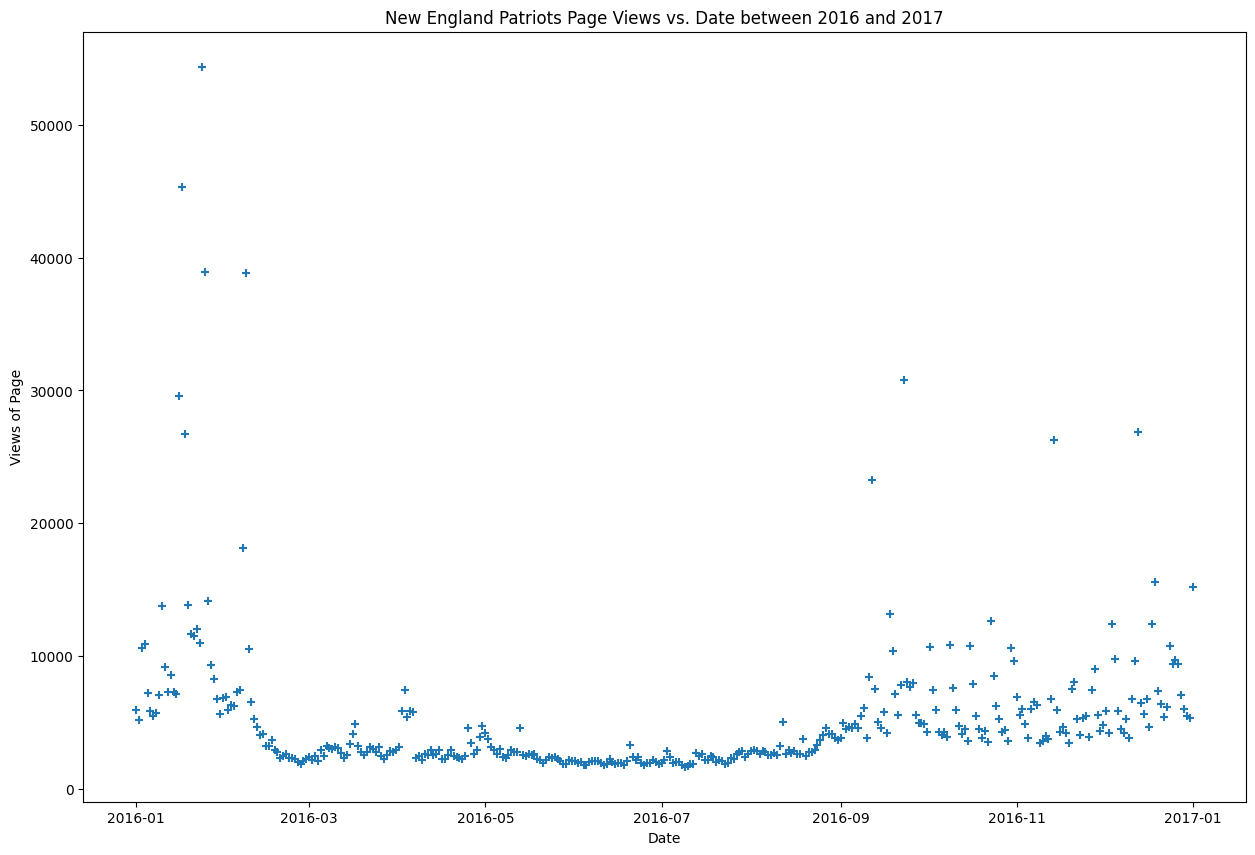

In [25]:
plt.figure(figsize=(15, 10))
plt.scatter(df["date"], df["views"], marker="+")

plt.xlabel("Date")
plt.ylabel("Views of Page")

plt.title("New England Patriots Page Views vs. Date between 2016 and 2017")

plt.show()